In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime


%matplotlib inline

In [2]:
#TEST
#Tickers = ["ARKK", "ENOR", "EWC", "FXC", "FXE", "KBA", "KWEB", "XLK", "TLT"]
def get_data(tickersymbol):
    ticker_data = yf.Ticker(tickersymbol)
    ticker_info = ticker_data.info
    investment_name = ticker_info['shortName']
    print(investment_name)
    
    today = datetime.datetime.today().isoformat()
    print("Today is: " + today[:10])
    
    ticker_df = ticker_data.history(period='1d', start='2019-07-15', end=today[:10])
    last_price = ticker_df["Close"].iloc[-1]
    print(ticker_df)
    print(f"{investment_name} price is: ${last_price}")
    #ticker_df["Close"].plot()
get_data('TLT')
print()
#get_data('TLT')

iShares 20+ Year Treasury Bond 
Today is: 2020-08-02
              Open    High     Low   Close   Volume  Dividends  Stock Splits
Date                                                                        
2019-07-15  128.01  128.60  128.01  128.52  6055500        0.0             0
2019-07-16  127.73  128.16  127.53  128.14  6172700        0.0             0
2019-07-17  128.61  129.55  128.60  129.52  9662200        0.0             0
2019-07-18  129.01  129.84  128.78  129.53  5724900        0.0             0
2019-07-19  129.13  129.46  129.05  129.22  5804800        0.0             0
...            ...     ...     ...     ...      ...        ...           ...
2020-07-27  170.25  170.30  168.99  169.11  6146400        0.0             0
2020-07-28  169.54  170.34  169.43  170.28  8520700        0.0             0
2020-07-29  170.05  170.39  168.98  169.99  6733700        0.0             0
2020-07-30  171.05  171.26  170.75  171.11  9376100        0.0             0
2020-07-31  170.15  171

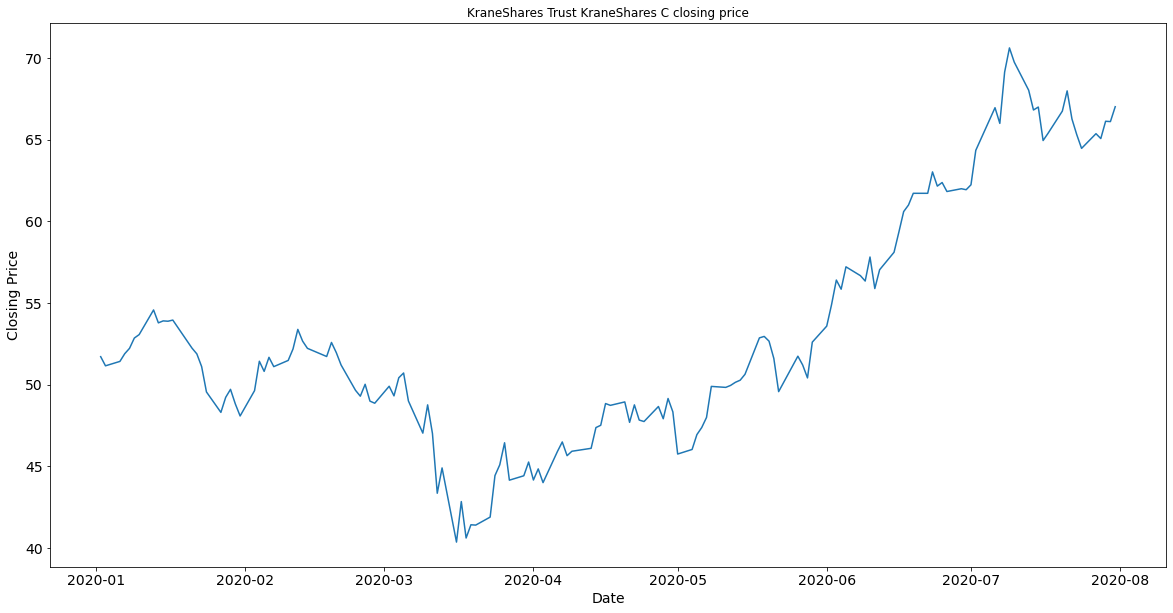

In [4]:
#Charting test
tickers = ['DBC', 'TLT']
def create_plot(tickersymbol):
    ticker_data = yf.Ticker(tickersymbol)
    today = datetime.datetime.today().isoformat()
    
    ticker_df = ticker_data.history(period='1d', start='2020-01-1', end=today[:10])
    plt.subplots(figsize=(20,10))
    plt.plot(ticker_df["Close"], label=ticker_data.info['shortName'])
    plt.xlabel("Date", fontdict={'fontsize':'14'})
    plt.ylabel("Closing Price", fontdict={'fontsize':'14'})
    plt.xticks(size = 14)
    plt.yticks(size = 14)
    plt.title(f"{ticker_data.info['shortName']} closing price")
    plt.savefig(f'{tickersymbol}.png', bbox_inches="tight")
#create_plot('DBC')
#create_plot('TLT')
#create_plot('FXE')
create_plot('KWEB')

# Multiple Ticker Analysis

In [5]:
#tickers = ['DBC', 'TLT']
start_date = "2020-05-29"

In [7]:
#Download stock data
def download_data(tickers, start_date):
    stock_data = yf.download(tickers,start=start_date)
    stock_data = stock_data.drop(columns=["Close", "High", "Low", "Open", "Volume"])
    return stock_data

#dbc_tlt_df = download_data(['DBC', 'TLT'], "2020-03-23")
BIG_5_df = download_data(['AAPL', 'AMZN','FB', 'GOOG', 'MSFT'], "2019-12-31")
BIG_5_df.head()

[*********************100%***********************]  5 of 5 completed


Adj Close                                                  
                  AAPL         AMZN          FB         GOOG        MSFT
Date                                                                    
2019-12-31  292.163818  1847.839966  205.250000  1337.020020  156.833633
2020-01-02  298.829956  1898.010010  209.779999  1367.369995  159.737595
2020-01-03  295.924713  1874.969971  208.669998  1360.660034  157.748581
2020-01-06  298.282715  1902.880005  212.600006  1394.209961  158.156342
2020-01-07  296.879883  1906.859985  213.059998  1393.339966  156.714310

In [8]:
# calculate daily returns
def calculate_daily_returns(df):
    df = df.pct_change()
    df = df.dropna()
    return df

#dbc_tlt_returns = calculate_daily_returns(dbc_tlt_df)
BIG_5_returns = calculate_daily_returns(BIG_5_df)
BIG_5_returns.head()

Adj Close                                        
                AAPL      AMZN        FB      GOOG      MSFT
Date                                                        
2020-01-02  0.022816  0.027151  0.022071  0.022700  0.018516
2020-01-03 -0.009722 -0.012139 -0.005291 -0.004907 -0.012452
2020-01-06  0.007968  0.014886  0.018834  0.024657  0.002585
2020-01-07 -0.004703  0.002092  0.002164 -0.000624 -0.009118
2020-01-08  0.016086 -0.007809  0.010138  0.007880  0.015928

In [9]:
test = (1+BIG_5_returns).cumprod()
test.tail()

Adj Close                                        
                AAPL      AMZN        FB      GOOG      MSFT
Date                                                        
2020-07-27  1.298039  1.653395  1.137637  1.144485  1.299785
2020-07-28  1.276715  1.623696  1.121169  1.122152  1.288117
2020-07-29  1.301188  1.641663  1.136614  1.138367  1.301124
2020-07-30  1.316932  1.651593  1.142509  1.145420  1.300104
2020-07-31  1.454800  1.712637  1.235907  1.109153  1.307181

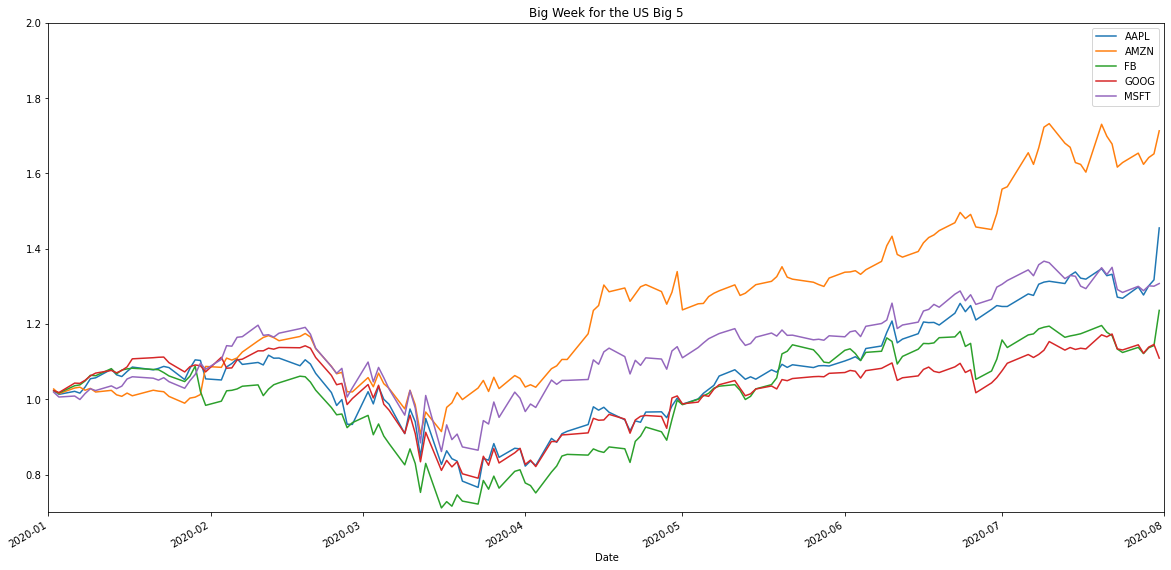

In [11]:
# Clean and calculate cumulative returns finally chart
def create_multiple_ticker_chart(df, title, image_title, tickers):
    cumulative_returns = (1+df).cumprod()
    ax = cumulative_returns.plot(figsize=(20,10), title=title)
    ax.axis(["2020-01-01","2020-08-01",0.70,2.00])
    ax.legend(tickers)
    plt.savefig(f'{image_title}.png', bbox_inches="tight")
"""
create_multiple_ticker_chart(dbc_tlt_returns, 
                             "Commodities and Treasury Yields Indicating Stagflation Risk is Rising",
                             "Commodities_yields_cumulative_returns", 
                             ["DBC", "TLT"])
"""
create_multiple_ticker_chart(BIG_5_returns, 
                             "Big Week for the US Big 5",
                             "Big Week for the US Big 5", 
                             ['AAPL', 'AMZN','FB', 'GOOG', 'MSFT'])

In [ ]:
#PLACEHOLDER
cumulative_returns = (1+stock_returns).cumprod()
ax = cumulative_returns.plot(figsize=(20,10), title="Commodities and Treasury yields indicating stagflation risk increasing")
ax.axis(["2020-06-01","2020-07-24",0.95,1.10])
ax.legend(["Invesco DB Commodity Tracking ETF", "iShares Barclays 20+ Yr Treas.Bond (TLT)"])
plt.savefig(f'Commodities_yields_cumulative_returns.png', bbox_inches="tight")

## Risk Analysis
(i) Volatility calculation
(i) Charting volatility


In [11]:
stock_std = stock_returns.std()
stock_std

Adj Close  AAPL    0.017556
           MSFT    0.016151
           TSLA    0.034185
dtype: float64

In [12]:
# Calculate the annualized standard deviation (252 trading days)
stock_std_annual = stock_std * np.sqrt(252)
stock_std_annual

Adj Close  AAPL    0.278695
           MSFT    0.256388
           TSLA    0.542671
dtype: float64

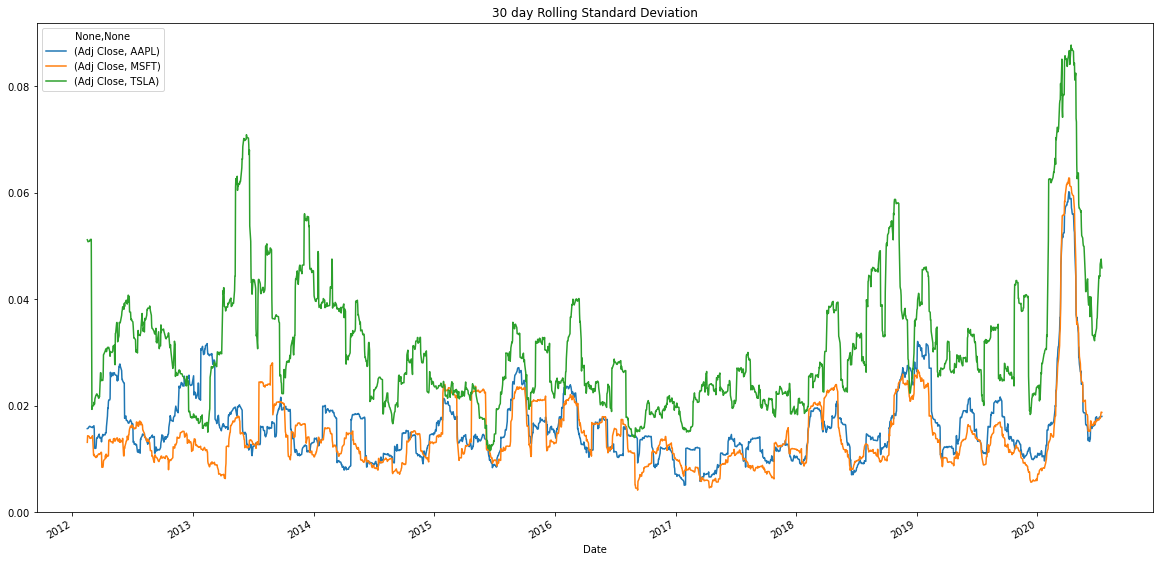

In [13]:
# Realized volatility over 30 days

stock_std_rolling = stock_returns.rolling(window=30).std()
ax = stock_std_rolling.plot(figsize=(20,10),title = "30 day Rolling Standard Deviation")
#ax.axis(["2015-03-03", "2019-05-01", 0.0, 0.035])